Classification Project - EDA

Introduction

This is a classification project in which the predictions will be about knowing to which class a certain observation belongs to. There can be two classes or more than two classes. The current case involves only two classes which makes this a binary classification.

As for any machine learning project, the first step will be the Exploratory Data Analysis or EDA. In EDA the data will be analyzed in detail. Here we will check for missing or null values, any errors in the entries or their data types, data distributions in all the columns, presence of any outliers, and check for correlations.

If any of the above are found to be out of the normal, they will be dealt with here before proceeding to model building.

About the problem


Ind_ID: Client ID

Gender: Gender information

Car_owner: Having car or not

Propert_owner: Having property or not

Children: Count of children

Annual_income: Annual income

Type_Income: Income type

Education: Education level

Marital_status: Marital_status

Housing_type: Living style

Birthday_count: Use backward count from current day (0), -1 means yesterday.

Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

Mobile_phone: Any mobile phone

Work_phone: Any work phone

Phone: Any phone number

EMAIL_ID: Any email ID

Type_Occupation: Occupation

Family_Members: Family size



In [1]:
import warnings
warnings.filterwarnings('ignore')

Importing the libraries
For EDA, the important libraries are pandas for reading the file and for some dataframe operations, matplotlib and seaborn for making graphical analysis on the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, classification_report, roc_auc_score,roc_curve

In [3]:
df1=pd.read_csv('/content/Credit_card.csv')
df2=pd.read_csv('/content/Credit_card_label.csv')

In [4]:
df=pd.merge(df1,df2, on='Ind_ID')
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [6]:
df.shape

(1548, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [9]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

Checking for any data types

In [11]:

df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object


Creating additional columns

In [12]:
df['Age'] = round(df['Birthday_count']/365,0)
df['Years of Experience'] = round(df['Employed_days']/365,0)

In [13]:
df.shape

(1548, 21)

In [14]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Years of Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,-51.0,1001.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,NaN,-2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0


In [15]:
df[df['Years of Experience']>=1001]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Years of Experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,-51.0,1001.0
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,-61.0,1001.0
26,5024916,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2,1,-60.0,1001.0
27,5024917,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2,1,-60.0,1001.0
31,5029311,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,1,NaN,2,1,-60.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,5024077,F,Y,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,365243,1,0,0,0,NaN,1,0,-56.0,1001.0
1511,5053535,F,N,Y,0,216000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1,0,-56.0,1001.0
1514,5051097,F,N,N,0,69750.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,...,365243,1,0,1,0,NaN,1,0,-60.0,1001.0
1525,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2,0,-60.0,1001.0


In [16]:
df=df[df['Years of Experience']<1001]
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Years of Experience
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,NaN,-2.0
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-2182,1,0,0,0,Managers,2,0,-33.0,-6.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,-1209,1,0,0,0,Accountants,1,0,-28.0,-3.0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,0,-36.0,-7.0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-645,1,1,1,0,Drivers,2,0,-42.0,-2.0


Checking for outliers

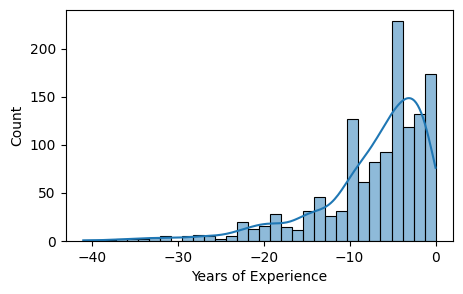

In [17]:
plt.figure(figsize=(5,3))
sns.histplot(df['Years of Experience'],kde=True)
plt.show()

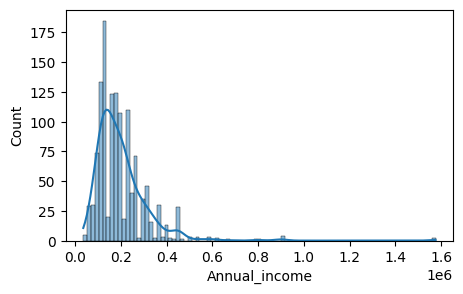

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(df['Annual_income'],kde=True)
plt.show()

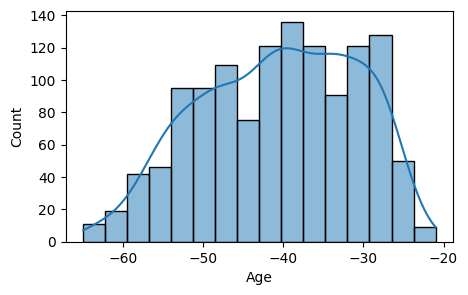

In [19]:
plt.figure(figsize=(5,3))
sns.histplot(df['Age'],kde=True)
plt.show()

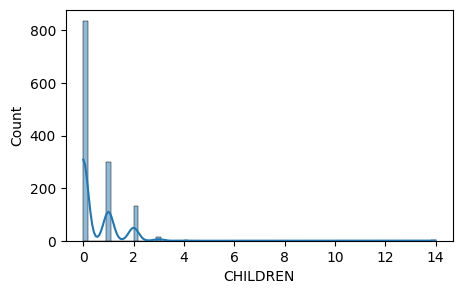

In [20]:
plt.figure(figsize=(5,3))
sns.histplot(df['CHILDREN'],kde=True)
plt.show()

<Axes: xlabel='Family_Members', ylabel='Count'>

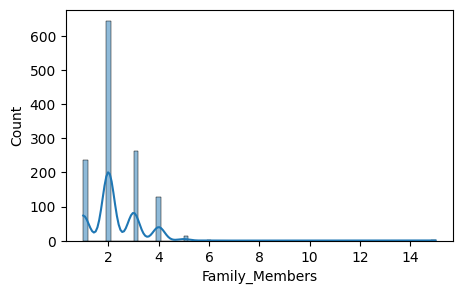

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(df['Family_Members'],kde=True)

Number of Outliers

In [22]:
df[df['Annual_income']>600000].shape

(11, 21)

In [23]:
df[df['Years of Experience']>30].shape

(0, 21)

In [24]:
df[df['Age']>70].shape

(0, 21)

In [25]:
df[df['CHILDREN']>3].shape

(2, 21)

In [26]:
df[df['Family_Members']>5].shape

(2, 21)

Removal Of Outliers

In [27]:
df=df[df['Annual_income']<600000]
df=df[df['Years of Experience']<30]
df=df[df['Age']<70]
df=df[df['CHILDREN']<3]
df=df[df['Family_Members']<5]

In [28]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Years of Experience
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,-37.0,-2.0
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-678,1,0,1,1,Core staff,3,1,-50.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-3536,1,0,1,0,Drivers,3,0,-31.0,-10.0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,-1209,1,0,0,0,Accountants,1,0,-28.0,-3.0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,0,-36.0,-7.0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-645,1,1,1,0,Drivers,2,0,-42.0,-2.0


In [29]:
df['Years of Experience'] = df['Years of Experience'].astype(int)

In [30]:
df['Family_Size']=df['CHILDREN']+df['Family_Members']

Dropping unnecessary columns

In [31]:
df.drop(['Ind_ID', 'Birthday_count','CHILDREN', 'Family_Members','Employed_days', 'Mobile_phone', 'Work_Phone',
        'Phone', 'EMAIL_ID'], axis=1, inplace=True)
df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,label,Age,Years of Experience,Family_Size
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1,-37.0,-2,2
4,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1,-37.0,-2,2
5,NaN,Y,N,315000.0,Pensioner,Higher education,Married,House / apartment,NaN,1,-37.0,-2,2
6,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1,-37.0,-2,2
8,M,Y,Y,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff,1,-50.0,-2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,360000.0,State servant,Secondary / secondary special,Married,House / apartment,Drivers,0,-31.0,-10,4
1544,F,N,N,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,0,-28.0,-3,1
1545,M,Y,Y,180000.0,Working,Higher education,Married,House / apartment,Managers,0,-36.0,-7,6
1546,M,Y,N,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers,0,-42.0,-2,2


Checking for statistical parameters in each column

In [32]:
df.describe()

,Annual_income,label,Age,Years of Experience,Family_Size
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,193032.382979,0.107201,-40.732406,-7.333879,2.662029
std,90411.979204,0.309496,9.747823,6.641010,1.486885
min,36000.000000,0.000000,-65.000000,-41.000000,1.000000
25%,135000.000000,0.000000,-48.000000,-10.000000,2.000000
50%,180000.000000,0.000000,-40.000000,-5.000000,2.000000
75%,225000.000000,0.000000,-33.000000,-3.000000,4.000000
max,585000.000000,1.000000,-21.000000,0.000000,6.000000


Handling Null Values

In [33]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Medicine staff', 'Security staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [34]:
df['Type_Occupation'].mode()

0    Laborers
Name: Type_Occupation, dtype: object

In [35]:
df['Type_Occupation']= df['Type_Occupation'].fillna('Laborers')
df.head()

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,label,Age,Years of Experience,Family_Size
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
4,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
5,NaN,Y,N,315000.0,Pensioner,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
6,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
8,M,Y,Y,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff,1,-50.0,-2,4


In [36]:
df['Type_Occupation'].value_counts()

Laborers                 469
Core staff               170
Managers                 125
Sales staff              118
Drivers                   84
High skill tech staff     61
Medicine staff            48
Accountants               40
Security staff            22
Cleaning staff            20
Cooking staff             19
Private service staff     16
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [37]:
df = df.dropna()
df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,label,Age,Years of Experience,Family_Size
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
4,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
6,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,1,-37.0,-2,2
8,M,Y,Y,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,Core staff,1,-50.0,-2,4
9,M,Y,Y,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,Core staff,1,-50.0,-2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,M,Y,N,360000.0,State servant,Secondary / secondary special,Married,House / apartment,Drivers,0,-31.0,-10,4
1544,F,N,N,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants,0,-28.0,-3,1
1545,M,Y,Y,180000.0,Working,Higher education,Married,House / apartment,Managers,0,-36.0,-7,6
1546,M,Y,N,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers,0,-42.0,-2,2


In [38]:
df['Age'] = df['Age'].astype(int)

In [39]:
df.shape

(1216, 13)

In [40]:
df.isnull().sum()

GENDER                 0
Car_Owner              0
Propert_Owner          0
Annual_income          0
Type_Income            0
EDUCATION              0
Marital_status         0
Housing_type           0
Type_Occupation        0
label                  0
Age                    0
Years of Experience    0
Family_Size            0
dtype: int64

Checking for the correlations

In [41]:
df.corr()

,Annual_income,label,Age,Years of Experience,Family_Size
Annual_income,1.000000,0.046405,-0.035601,0.006106,0.015611
label,0.046405,1.000000,-0.024047,0.096365,-0.014978
Age,-0.035601,-0.024047,1.000000,0.348153,0.198219
Years of Experience,0.006106,0.096365,0.348153,1.000000,0.036329
Family_Size,0.015611,-0.014978,0.198219,0.036329,1.000000


No columns are co-related with each other

In [42]:
df.to_csv("df.csv",index=False,header=True)

Converting columns into Binary

Since few columns are in categorical, we cannot use it in model building and further analysis. So, to do these we need to change into an integer column retaining its categorical properties.

Using the label encoder

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['Car_Owner']=le.fit_transform(df['Car_Owner'])
df['Propert_Owner']=le.fit_transform(df['Propert_Owner'])
df['Housing_type']=le.fit_transform(df['Housing_type'])
df['Type_Income']=le.fit_transform(df['Type_Income'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['EDUCATION']=le.fit_transform(df['EDUCATION'])
df['Type_Occupation']=le.fit_transform(df['Type_Occupation'])
df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,label,Age,Years of Experience,Family_Size
1,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
4,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
6,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
8,1,1,1,450000.0,0,4,1,1,3,1,-50,-2,4
9,1,1,1,450000.0,1,4,1,1,3,1,-50,-2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,1,0,360000.0,2,4,1,1,4,0,-31,-10,4
1544,0,0,0,225000.0,0,2,3,1,0,0,-28,-3,1
1545,1,1,1,180000.0,3,1,1,1,10,0,-36,-7,6
1546,1,1,0,270000.0,3,4,0,1,4,0,-42,-2,2


Univariate Analysis

Checking count of each category in the independent variables.

Here the count of each category in the variables can be seen both in tabular and visual formats.

Gender

In [44]:
df['GENDER'].value_counts()

0    724
1    492
Name: GENDER, dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

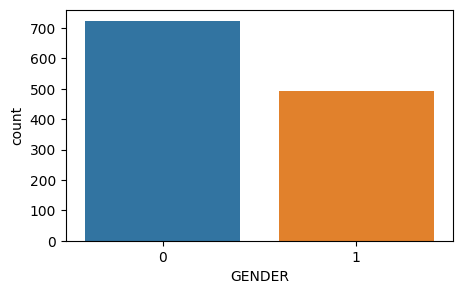

In [45]:
plt.figure(figsize=(5,3))
sns.countplot(x='GENDER', data=df)

<Axes: title={'center': 'GENDER'}, ylabel='GENDER'>

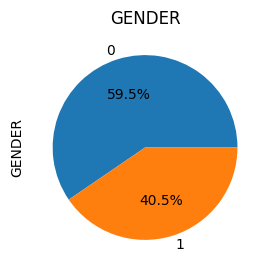

In [46]:
plt.figure(figsize=(5,3))  #to calulate percentage
df['GENDER'].value_counts().plot(kind='pie', title = 'GENDER', autopct='%1.1f%%')

Age

In [47]:
df['Age'].unique()

array([-37, -50, -52, -24, -46, -35, -33, -49, -44, -43, -55, -29, -36,
       -56, -58, -53, -42, -30, -32, -26, -28, -51, -45, -25, -38, -31,
       -40, -34, -47, -41, -54, -27, -39, -48, -59, -57, -23, -65, -64,
       -62, -61, -60, -22, -21, -63])

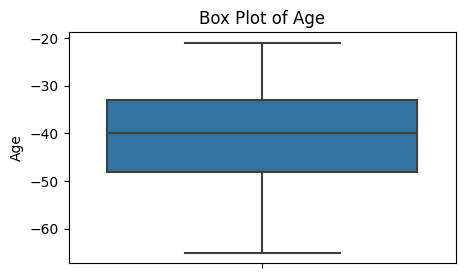

In [48]:
plt.figure(figsize=(5,3))
sns.boxplot(df, y ='Age')
plt.title('Box Plot of Age')
plt.show()

Marital_status

In [49]:
df['Marital_status'].value_counts()

1    845
3    183
0     90
2     70
4     28
Name: Marital_status, dtype: int64

<Axes: title={'center': 'Marital Status'}, ylabel='Marital_status'>

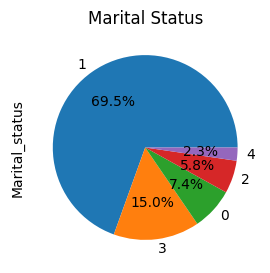

In [50]:
plt.figure(figsize=(5,3))
df['Marital_status'].value_counts().plot(kind='pie', title = 'Marital Status', autopct='%1.1f%%')

<Axes: xlabel='Marital_status', ylabel='count'>

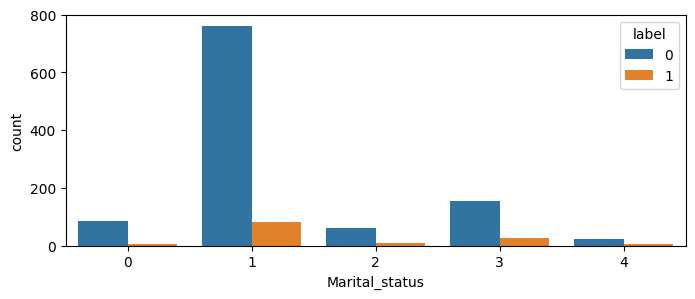

In [51]:
plt.figure(figsize=(8,3))
sns.countplot(x='Marital_status', hue='label', data=df)

Family_Size

In [52]:
df['Family_Size'].value_counts()

2    582
4    245
1    223
6    120
3     39
5      7
Name: Family_Size, dtype: int64

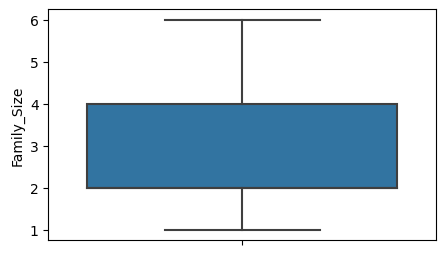

In [53]:
plt.figure(figsize=(5,3))
sns.boxplot(df, y ='Family_Size')
plt.show()

<Axes: xlabel='Family_Size', ylabel='count'>

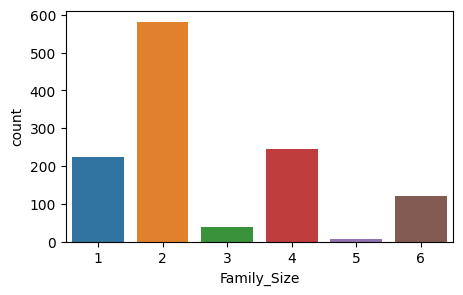

In [54]:
plt.figure(figsize=(5,3))
sns.countplot(x='Family_Size', data=df)

Housing_type

In [55]:
df['Housing_type'].value_counts()

1    1070
5      79
2      34
4      20
3       8
0       5
Name: Housing_type, dtype: int64

<Axes: title={'center': 'Housing_type'}, ylabel='Housing_type'>

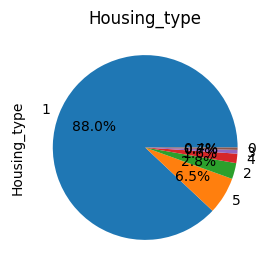

In [56]:
plt.figure(figsize=(5,3))
df['Housing_type'].value_counts().plot(kind='pie', title = 'Housing_type', autopct='%1.1f%%')

<Axes: xlabel='Housing_type', ylabel='count'>

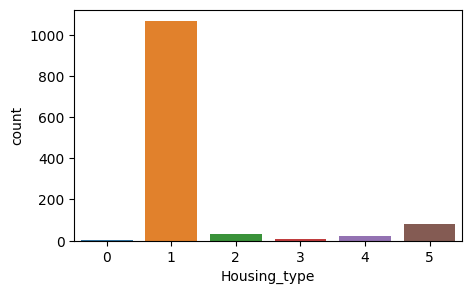

In [57]:
plt.figure(figsize=(5,3))
sns.countplot(x='Housing_type', data=df)

Annual_income

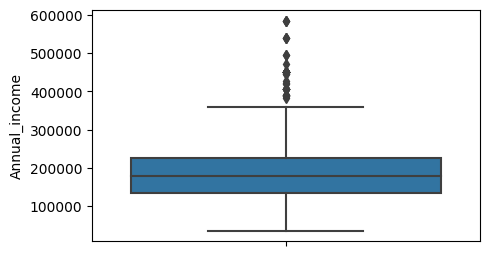

In [58]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y ='Annual_income')
plt.show()

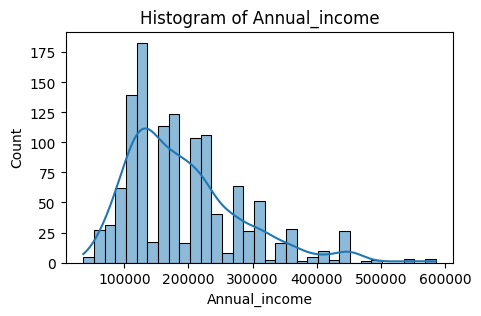

In [59]:
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='Annual_income', kde=True)
plt.title('Histogram of Annual_income')
plt.show()

Type_Occupation

In [60]:
df['Type_Occupation'].value_counts()

8     468
3     168
10    124
14    117
4      84
6      60
11     48
0      40
16     22
1      20
2      19
12     16
9       9
15      9
17      5
5       3
7       2
13      2
Name: Type_Occupation, dtype: int64

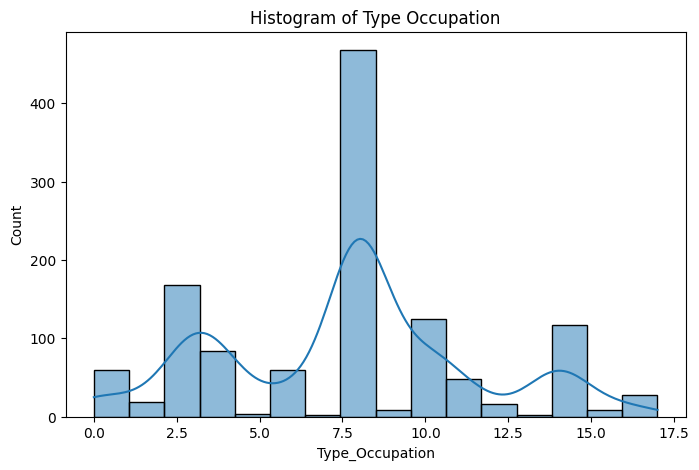

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Type_Occupation', kde=True)
plt.title('Histogram of Type Occupation')
plt.show()

Type_Income

In [62]:
df['Type_Income'].value_counts()

3    756
0    341
2    112
1      7
Name: Type_Income, dtype: int64

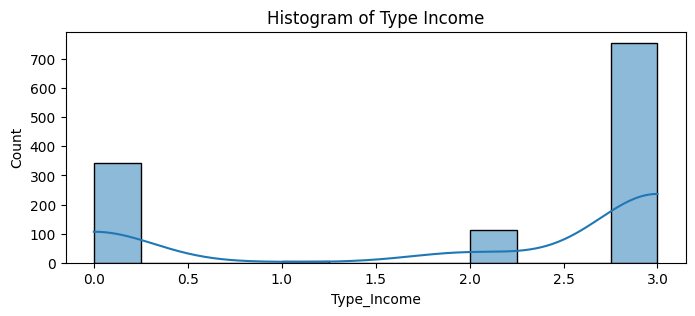

In [63]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Type_Income', kde=True)
plt.title('Histogram of Type Income')
plt.show()

<Axes: title={'center': 'Type Income'}, ylabel='Type_Income'>

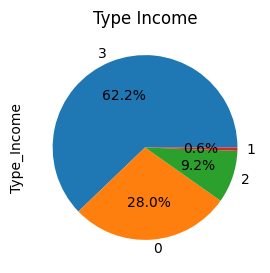

In [64]:
plt.figure(figsize=(5,3))
df['Type_Income'].value_counts().plot(kind='pie', title = 'Type Income', autopct='%1.1f%%')

EDUCATION

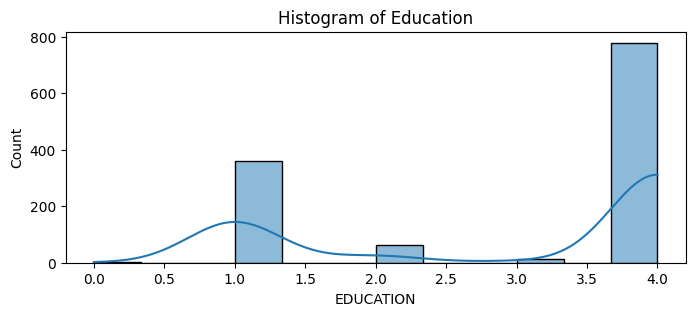

In [65]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='EDUCATION', kde=True)
plt.title('Histogram of Education')
plt.show()

<Axes: title={'center': 'Education'}, ylabel='EDUCATION'>

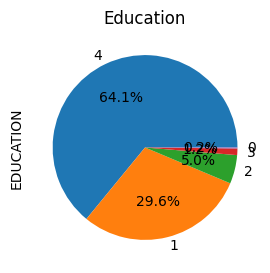

In [66]:
plt.figure(figsize=(5,3))
df['EDUCATION'].value_counts().plot(kind='pie', title = 'Education', autopct='%1.1f%%')

Years of Experience

In [67]:
df['Years of Experience'].describe()

count    1216.000000
mean       -7.340461
std         6.650539
min       -41.000000
25%       -10.000000
50%        -5.000000
75%        -3.000000
max         0.000000
Name: Years of Experience, dtype: float64

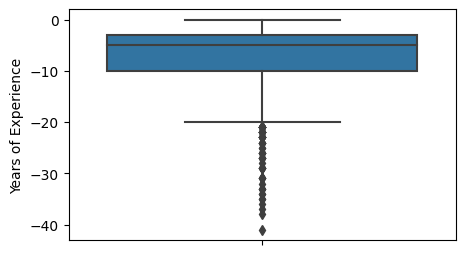

In [68]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df, y ='Years of Experience')
plt.show()

Car_Owner

In [69]:
df['Car_Owner'].value_counts()

0    693
1    523
Name: Car_Owner, dtype: int64

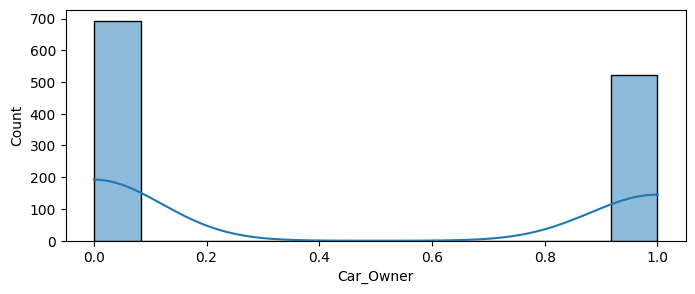

In [70]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Car_Owner', kde=True)
plt.show()

Propert_Owner

In [71]:
df['Propert_Owner'].value_counts()

1    762
0    454
Name: Propert_Owner, dtype: int64

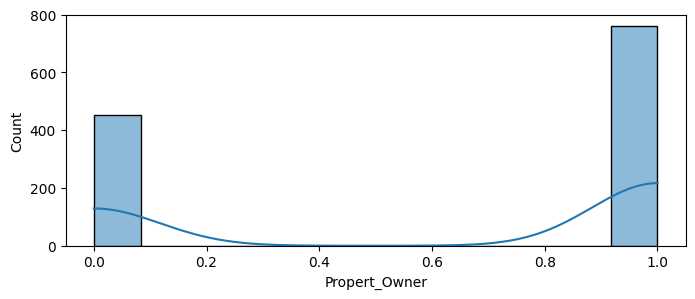

In [72]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Propert_Owner', kde=True)
plt.show()

Label (Target Variable)

In [73]:
df['label'].value_counts()

0    1089
1     127
Name: label, dtype: int64

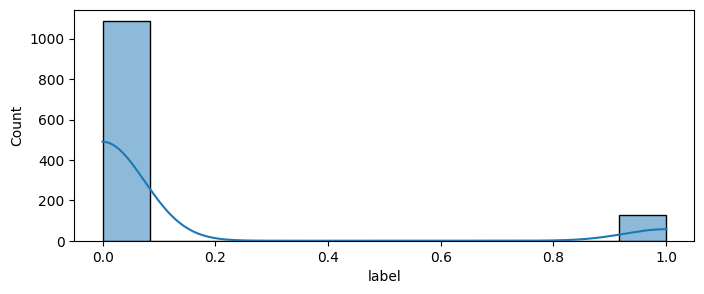

In [74]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='label', kde=True)
plt.show()

Bivariate Analysis with target variable

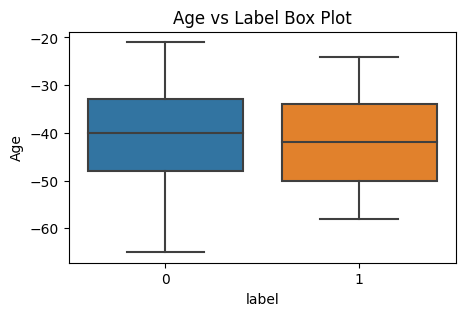

In [75]:
plt.figure(figsize=(5,3))
sns.boxplot(x='label', y='Age', data=df)
plt.title('Age vs Label Box Plot')
plt.show()

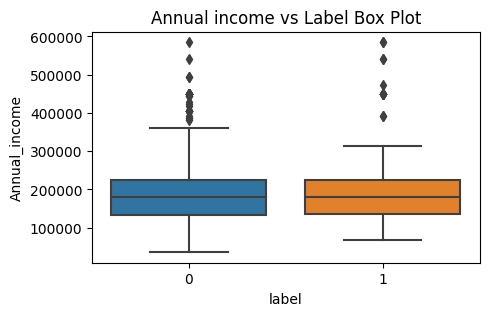

In [76]:
plt.figure(figsize=(5,3))
sns.boxplot(x='label', y='Annual_income', data=df)
plt.title('Annual income vs Label Box Plot')
plt.show()

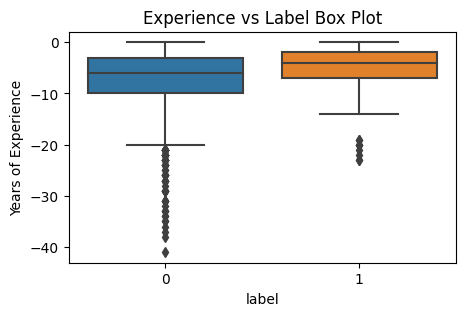

In [77]:
plt.figure(figsize=(5,3))
sns.boxplot(x='label', y='Years of Experience', data=df)
plt.title('Experience vs Label Box Plot')
plt.show()

Density plots

These will give information about the distribution of the data.

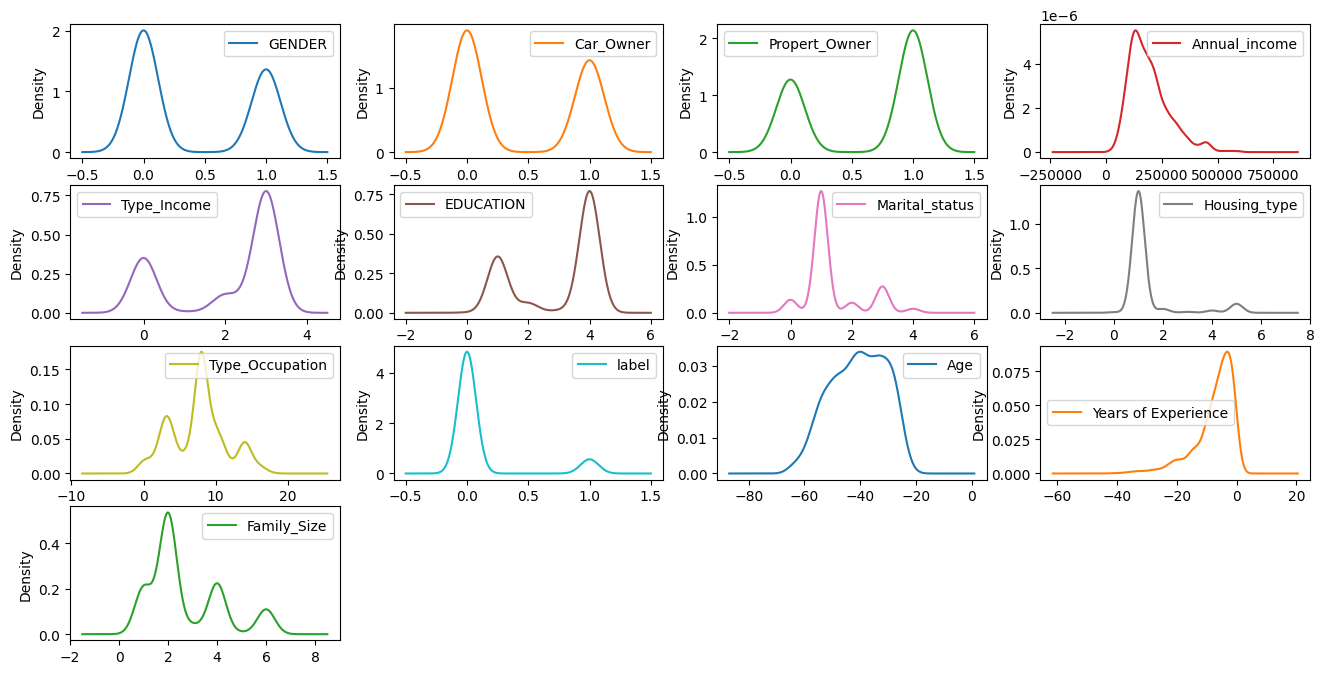

In [78]:


df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize = (16, 8))
plt.show()

Box plots of all the columns
In the box plots we can find the presence of outliers in the data and also some information about the data distribution

<Figure size 1500x800 with 0 Axes>

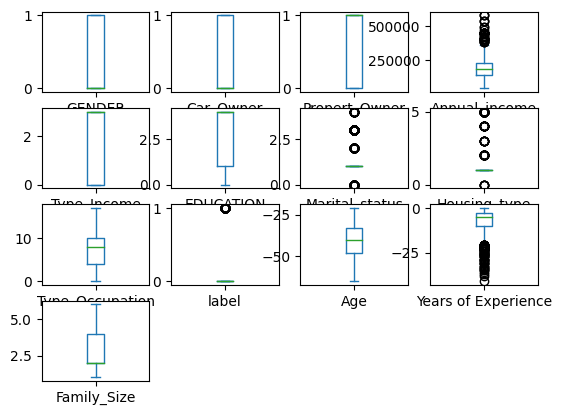

In [79]:
plt.figure(figsize=(15,8))
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

Correlation heatmap
This is a graphical representation of the correlation matrix

<Axes: >

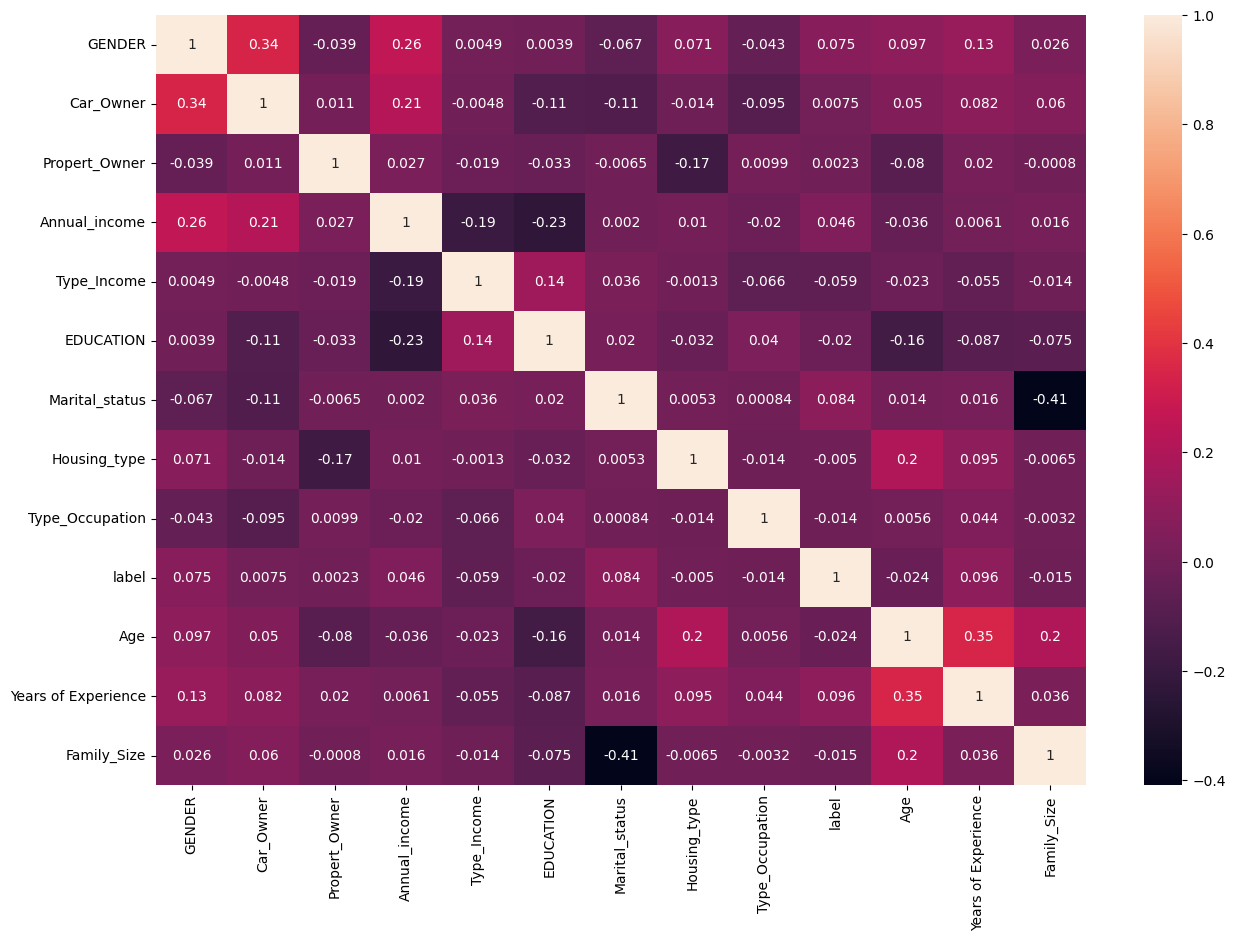

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

Bivariate Analysis

<Figure size 500x200 with 0 Axes>

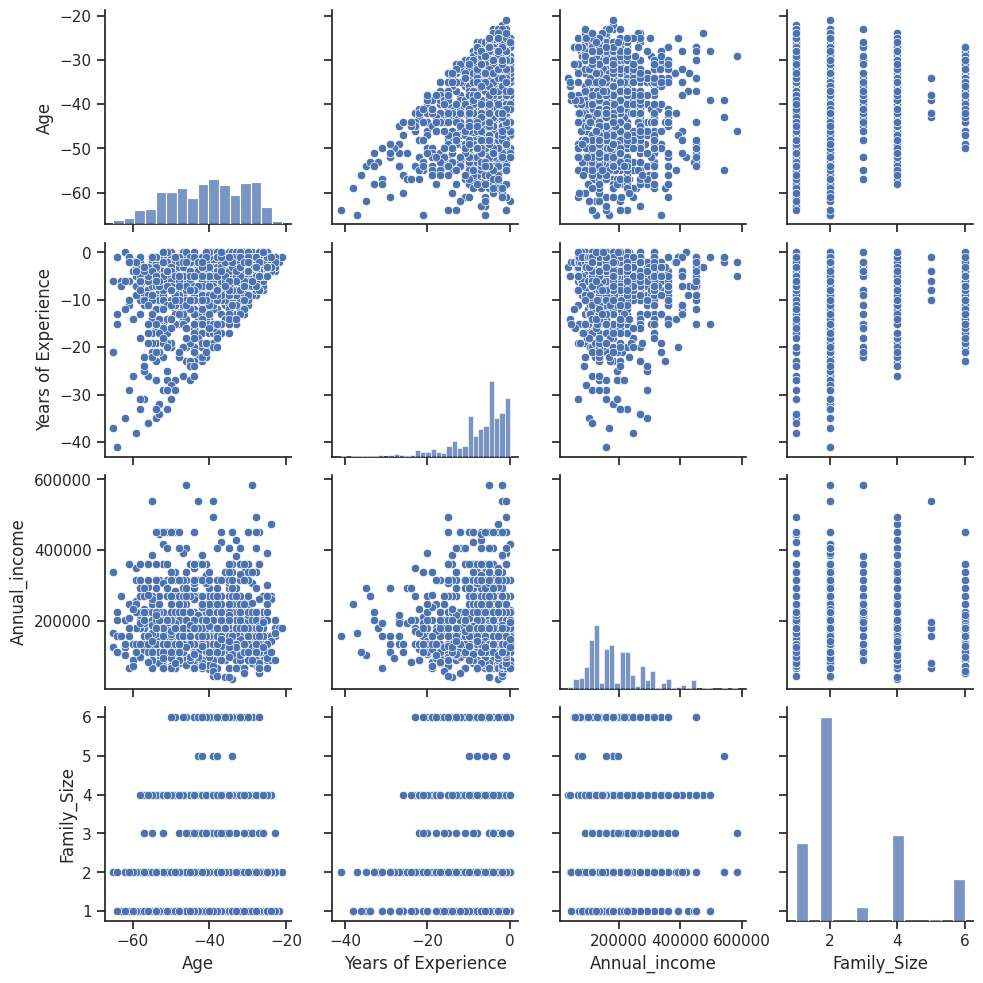

<Figure size 500x200 with 0 Axes>

In [81]:
numerical_cols = ['Age', 'Years of Experience', 'Annual_income','Family_Size']

sns.set_theme(style="ticks")
sns.pairplot(df[numerical_cols])
plt.figure(figsize=(5,2))

Final DF

In [82]:
df

,GENDER,Car_Owner,Propert_Owner,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,label,Age,Years of Experience,Family_Size
1,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
4,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
6,0,1,0,315000.0,0,1,1,1,8,1,-37,-2,2
8,1,1,1,450000.0,0,4,1,1,3,1,-50,-2,4
9,1,1,1,450000.0,1,4,1,1,3,1,-50,-2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,1,1,0,360000.0,2,4,1,1,4,0,-31,-10,4
1544,0,0,0,225000.0,0,2,3,1,0,0,-28,-3,1
1545,1,1,1,180000.0,3,1,1,1,10,0,-36,-7,6
1546,1,1,0,270000.0,3,4,0,1,4,0,-42,-2,2


# Model Building

After the EDA, we will proceed with training different machine learning models with the data. The training is done by splitting the data into training and testing sets. The key metric to determine the best model in case of classification problems is the F1 Score. So the models with highest training and testing F1 Scores will be chosen as the best ones.

In [83]:
x = df.loc[:, ['GENDER','Car_Owner','Propert_Owner','Annual_income','Type_Income','EDUCATION','Marital_status',
               'Housing_type','Type_Occupation','Family_Size','Age','Years of Experience']]
y = df['label']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [86]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

log_train_acc = accuracy_score(y_train, y_pred_train)
log_test_acc = accuracy_score(y_test, y_pred_test)

log_train_f1 = f1_score(y_train, y_pred_train)
log_test_f1 = f1_score(y_test, y_pred_test)

log_train_prec = precision_score(y_train, y_pred_train)
log_test_prec = precision_score(y_test, y_pred_test)

log_train_roc = roc_auc_score(y_train, y_pred_train)
log_test_roc = roc_auc_score(y_test, y_pred_test)

log_train_cm = confusion_matrix(y_train, y_pred_train)
log_test_cm = confusion_matrix(y_test, y_pred_test)


print('Logistic Regression of training accuracy is', log_train_acc)
print('Logistic Regression of testing accuracy is', log_test_acc)
print('--------------------------------------------------------')
print('Logistic Regression of training F1_score is', log_train_f1)
print('Logistic Regression of testing F1_score is', log_test_f1)
print('--------------------------------------------------------')
print('Logistic Regression of training Precision is', log_train_prec)
print('Logistic Regression of testing Precision is', log_test_prec)
print('--------------------------------------------------------')
print('Logistic Regression of training ROC-AUC Score is', log_train_roc)
print('Logistic Regression of testing ROC-AUC Score is', log_test_roc)
print('--------------------------------------------------------')
print('Logistic Regression of training Confusion Matrix is')
print(log_train_cm)
print('--------------------------------------------------------')
print('Logistic Regression of testing Confusion Matrix is')
print(log_test_cm)

Logistic Regression of training accuracy is 0.8942420681551116
Logistic Regression of testing accuracy is 0.8986301369863013
--------------------------------------------------------
Logistic Regression of training F1_score is 0.0
Logistic Regression of testing F1_score is 0.0
--------------------------------------------------------
Logistic Regression of training Precision is 0.0
Logistic Regression of testing Precision is 0.0
--------------------------------------------------------
Logistic Regression of training ROC-AUC Score is 0.5
Logistic Regression of testing ROC-AUC Score is 0.5
--------------------------------------------------------
Logistic Regression of training Confusion Matrix is
[[761   0]
 [ 90   0]]
--------------------------------------------------------
Logistic Regression of testing Confusion Matrix is
[[328   0]
 [ 37   0]]


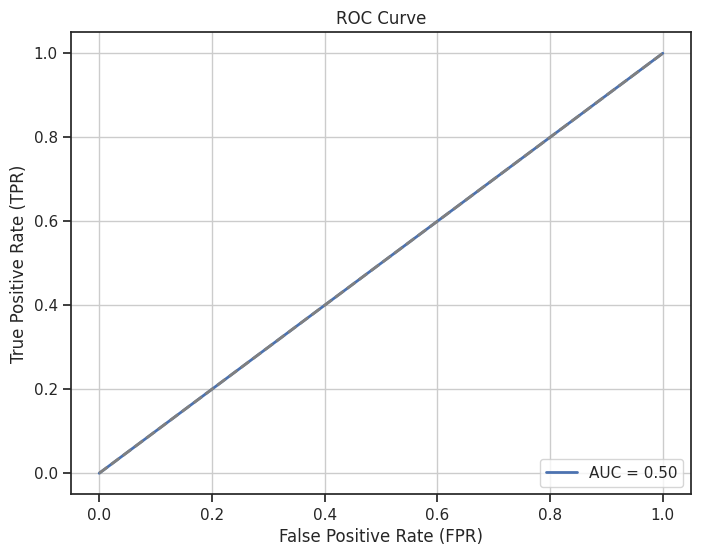

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'AUC = {log_test_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dec.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [89]:
y_pred_train = dec.predict(x_train)
y_pred_test = dec.predict(x_test)

dec_train_acc = accuracy_score(y_train, y_pred_train)
dec_test_acc = accuracy_score(y_test, y_pred_test)

dec_train_f1 = f1_score(y_train, y_pred_train)
dec_test_f1 = f1_score(y_test, y_pred_test)

dec_train_prec = precision_score(y_train, y_pred_train)
dec_test_prec = precision_score(y_test, y_pred_test)

dec_train_roc = roc_auc_score(y_train, y_pred_train)
dec_test_roc = roc_auc_score(y_test, y_pred_test)

dec_test_cm = confusion_matrix(y_test, y_pred_test)

print('Decision tree of training accuracy is', dec_train_acc)
print('Decision tree of testing accuracy is', dec_test_acc)
print('--------------------------------------------------------')
print('Decision tree of training F1_Score is', dec_train_f1)
print('Decision tree of testing F1_Score is', dec_test_f1)
print('--------------------------------------------------------')
print('Decision tree of training Precision is', dec_train_prec)
print('Decision tree of  testing Precision is', dec_test_prec)
print('--------------------------------------------------------')
print('Decision tree of training ROC-AUC Score is', dec_train_roc)
print('Decision tree of testing ROC-AUC Score is', dec_test_roc)
print('--------------------------------------------------------')
print('Decision tree of testing Confusion Matrix is')
print(dec_test_cm)

Decision tree of training accuracy is 0.9048178613396005
Decision tree of testing accuracy is 0.8931506849315068
--------------------------------------------------------
Decision tree of training F1_Score is 0.2285714285714286
Decision tree of testing F1_Score is 0.09302325581395349
--------------------------------------------------------
Decision tree of training Precision is 0.8
Decision tree of  testing Precision is 0.3333333333333333
--------------------------------------------------------
Decision tree of training ROC-AUC Score is 0.5646955759964958
Decision tree of testing ROC-AUC Score is 0.5209294660514172
--------------------------------------------------------
Decision tree of testing Confusion Matrix is
[[324   4]
 [ 35   2]]


#KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, y_pred_train)
knn_test_acc = accuracy_score(y_test, y_pred_test)

knn_train_f1 = f1_score(y_train, y_pred_train)
knn_test_f1 = f1_score(y_test, y_pred_test)

knn_train_roc = roc_auc_score(y_train, y_pred_train)
knn_test_roc = roc_auc_score(y_test, y_pred_test)

knn_test_cm = confusion_matrix(y_test, y_pred_test)

print('KNN training of accuracy is', knn_train_acc)
print('KNN testing of  accuracy is', knn_test_acc)
print('--------------------------------------------------------')
print('KNN training of F1 Score is', knn_train_f1)
print('KNN testing of F1 Score is', knn_test_f1)
print('--------------------------------------------------------')
print('KNN training of ROC-AUC Score is', knn_train_roc)
print('KNN testing of ROC-AUC Score is', knn_test_roc)
print('--------------------------------------------------------')
print('KNN testing of Confusion Matrix is')
print(knn_test_cm)

KNN training of accuracy is 0.9130434782608695
KNN testing of  accuracy is 0.8821917808219178
--------------------------------------------------------
KNN training of F1 Score is 0.43076923076923074
KNN testing of F1 Score is 0.0851063829787234
--------------------------------------------------------
KNN training of ROC-AUC Score is 0.6476711928748723
KNN testing of ROC-AUC Score is 0.5148319050758074
--------------------------------------------------------
KNN testing of Confusion Matrix is
[[320   8]
 [ 35   2]]


#Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(max_depth=5, criterion='entropy')
rnd.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [93]:
y_pred_train = rnd.predict(x_train)
y_pred_test = rnd.predict(x_test)

rnd_train_acc = accuracy_score(y_train, y_pred_train)
rnd_test_acc = accuracy_score(y_test, y_pred_test)

rnd_train_f1 = f1_score(y_train, y_pred_train)
rnd_test_f1 = f1_score(y_test, y_pred_test)

rnd_train_roc = roc_auc_score(y_train, y_pred_train)
rnd_test_roc = roc_auc_score(y_test, y_pred_test)

rnd_test_cm = confusion_matrix(y_test, y_pred_test)

print('Random Forest of training accuracy is', rnd_train_acc)
print('Random Forest of testing accuracy is', rnd_test_acc)
print('--------------------------------------------------------')
print('Random Forest of training F1 Score is', rnd_train_f1)
print('Random Forest of testing F1 Score is', rnd_test_f1)
print('--------------------------------------------------------')
print('Random Forest of training ROC-AUC Score is', rnd_train_roc)
print('Random Forest of testing ROC-AUC Score is', rnd_test_roc)
print('--------------------------------------------------------')
print('Random Forest of testing Confusion Matrix is')
print(rnd_test_cm)

Random Forest of training accuracy is 0.9012925969447708
Random Forest of testing accuracy is 0.8986301369863013
--------------------------------------------------------
Random Forest of training F1 Score is 0.125
Random Forest of testing F1 Score is 0.0
--------------------------------------------------------
Random Forest of training ROC-AUC Score is 0.5333333333333333
Random Forest of testing ROC-AUC Score is 0.5
--------------------------------------------------------
Random Forest of testing Confusion Matrix is
[[328   0]
 [ 37   0]]


#Bagging Classifier

In [94]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=RandomForestClassifier(max_depth = 5), n_estimators=10)
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5))

In [95]:

y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = accuracy_score(y_train, y_pred_train)
bag_test_acc = accuracy_score(y_test, y_pred_test)


bag_train_f1 = f1_score(y_train, y_pred_train)
bag_test_f1 = f1_score(y_test, y_pred_test)

bag_train_roc = roc_auc_score(y_train, y_pred_train)
bag_test_roc = roc_auc_score(y_test, y_pred_test)

bag_test_cm = confusion_matrix(y_test, y_pred_test)

print('Bagging training of accuracy is', bag_train_acc)
print('Bagging testing of accuracy is', bag_test_acc)
print('--------------------------------------------------------')
print('Bagging training of  F1 Score is', bag_train_f1)
print('Bagging testing of F1 Score is', bag_test_f1)
print('--------------------------------------------------------')
print('Bagging training of ROC-AUC Score is', bag_train_roc)
print('Bagging testing of ROC-AUC Score is', bag_test_roc)
print('--------------------------------------------------------')
print('Bagging testing of Confusion Matrix is')
print(bag_test_cm)

Bagging training of accuracy is 0.8977673325499412
Bagging testing of accuracy is 0.8986301369863013
--------------------------------------------------------
Bagging training of  F1 Score is 0.06451612903225806
Bagging testing of F1 Score is 0.0
--------------------------------------------------------
Bagging training of ROC-AUC Score is 0.5166666666666667
Bagging testing of ROC-AUC Score is 0.5
--------------------------------------------------------
Bagging testing of Confusion Matrix is
[[328   0]
 [ 37   0]]


#Ada Boost

This is another ensemble technique that assigns the weights to the parameters depending the errors. Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration. This will help it reach the convergence much faster.

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))
ada.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=5))

In [97]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_pred_train)
ada_test_acc = accuracy_score(y_test, y_pred_test)

ada_train_f1 = f1_score(y_train, y_pred_train)
ada_test_f1 = f1_score(y_test, y_pred_test)

ada_train_roc = roc_auc_score(y_train, y_pred_train)
ada_test_roc = roc_auc_score(y_test, y_pred_test)

ada_test_cm = confusion_matrix(y_test, y_pred_test)

print('AdaBoost training of accuracy is', ada_train_acc)
print('AdaBoost testing accuracy is', ada_test_acc)
print('--------------------------------------------------------')
print('AdaBoost training of  F1 Score is', ada_train_f1)
print('AdaBoost testing of F1 Score is', ada_test_f1)
print('--------------------------------------------------------')
print('AdaBoost training of ROC-AUC Score is', ada_train_roc)
print('AdaBoost testing of ROC-AUC Score is', ada_test_roc)
print('--------------------------------------------------------')
print('AdaBoost testing of Confusion Matrix is')
print(ada_test_cm)

AdaBoost training of accuracy is 0.9917743830787309
AdaBoost testing accuracy is 0.9424657534246575
--------------------------------------------------------
AdaBoost training of  F1 Score is 0.9613259668508287
AdaBoost testing of F1 Score is 0.631578947368421
--------------------------------------------------------
AdaBoost training of ROC-AUC Score is 0.9807052124397723
AdaBoost testing of ROC-AUC Score is 0.7401944627554383
--------------------------------------------------------
AdaBoost testing of Confusion Matrix is
[[326   2]
 [ 19  18]]


Gradient Boosting
This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=42)
grad.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [99]:
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = accuracy_score(y_train, y_pred_train)
grad_test_acc = accuracy_score(y_test, y_pred_test)

grad_train_f1 = f1_score(y_train, y_pred_train)
grad_test_f1 = f1_score(y_test, y_pred_test)

grad_train_roc = roc_auc_score(y_train, y_pred_train)
grad_test_roc = roc_auc_score(y_test, y_pred_test)

grad_test_cm = confusion_matrix(y_test, y_pred_test)

print('Gradient Boost training of accuracy is', grad_train_acc)
print('Gradient Boost testing of accuracy is', grad_test_acc)
print('--------------------------------------------------------')
print('Gradient Boost training of F1 Score is', grad_train_f1)
print('Gradient Boost testing of F1 Score is', grad_test_f1)
print('--------------------------------------------------------')
print('Gradient Boost training of ROC-AUC Score is', grad_train_roc)
print('Gradient Boost testing of ROC-AUC Score is', grad_test_roc)
print('--------------------------------------------------------')
print('Gradient Boost testing of Confusion Matrix is')
print(grad_test_cm)

Gradient Boost training of accuracy is 0.9353701527614571
Gradient Boost testing of accuracy is 0.9041095890410958
--------------------------------------------------------
Gradient Boost training of F1 Score is 0.5736434108527131
Gradient Boost testing of F1 Score is 0.339622641509434
--------------------------------------------------------
Gradient Boost training of ROC-AUC Score is 0.7042414951087749
Gradient Boost testing of ROC-AUC Score is 0.6109508899143045
--------------------------------------------------------
Gradient Boost testing of Confusion Matrix is
[[321   7]
 [ 28   9]]


#Support Vector Machine

In [100]:
from sklearn.svm import SVC

svcl = SVC(random_state=42)
svcl.fit(x_train , y_train)

SVC(random_state=42)

In [101]:
y_pred_train = svcl.predict(x_train)
y_pred_test = svcl.predict(x_test)

svcl_train_acc = accuracy_score(y_train, y_pred_train)
svcl_test_acc = accuracy_score(y_test, y_pred_test)

svcl_train_f1 = f1_score(y_train, y_pred_train)
svcl_test_f1 = f1_score(y_test, y_pred_test)

svcl_train_roc = roc_auc_score(y_train, y_pred_train)
svcl_test_roc = roc_auc_score(y_test, y_pred_test)

svcl_test_cm = confusion_matrix(y_test, y_pred_test)

print('SVC of training accuracy is', svcl_train_acc)
print('SVC of testing accuracy is', svcl_test_acc)
print('--------------------------------------------------------')
print('SVC of training F1 Score is', svcl_train_f1)
print('SVC of testing F1 Score is', svcl_test_f1)
print('--------------------------------------------------------')
print('SVC of training ROC-AUC Score is', svcl_train_roc)
print('SVC of testing ROC-AUC Score is', svcl_test_roc)
print('--------------------------------------------------------')
print('SVC of testing Confusion Matrix is')
print(svcl_test_cm)

SVC of training accuracy is 0.8942420681551116
SVC of testing accuracy is 0.8986301369863013
--------------------------------------------------------
SVC of training F1 Score is 0.0
SVC of testing F1 Score is 0.0
--------------------------------------------------------
SVC of training ROC-AUC Score is 0.5
SVC of testing ROC-AUC Score is 0.5
--------------------------------------------------------
SVC of testing Confusion Matrix is
[[328   0]
 [ 37   0]]


In [102]:
results = {
    'Model Name': ['Logistic Regression','Decision Tree', 'KNN', 'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVC'],
    'Training Accuracy': [log_train_acc, dec_train_acc, knn_train_acc, rnd_train_acc, bag_train_acc,
                          ada_train_acc, grad_train_acc, svcl_train_acc],
    'Testing Accuracy': [log_test_acc, dec_test_acc, knn_test_acc, rnd_test_acc, bag_test_acc,
                         ada_test_acc, grad_test_acc, svcl_test_acc],
    'Training F1 Score': [log_train_f1, dec_train_f1, knn_train_f1, rnd_train_f1, bag_train_f1,
                          ada_train_f1, grad_train_f1, svcl_train_f1],
    'Testing F1 Score': [log_test_f1, dec_test_f1, knn_test_f1, rnd_test_f1, bag_test_f1,
                         ada_test_f1, grad_test_f1, svcl_test_f1]
}


results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
0,Logistic Regression,0.894242,0.898630,0.000000,0.000000
1,Decision Tree,0.904818,0.893151,0.228571,0.093023
2,KNN,0.913043,0.882192,0.430769,0.085106
3,Random Forest,0.901293,0.898630,0.125000,0.000000
4,Bagging,0.897767,0.898630,0.064516,0.000000
5,AdaBoost,0.991774,0.942466,0.961326,0.631579
6,Gradient Boost,0.935370,0.904110,0.573643,0.339623
7,SVC,0.894242,0.898630,0.000000,0.000000


In [103]:
results_df.sort_values(by=['Training Accuracy', 'Testing Accuracy'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training F1 Score,Testing F1 Score
5,AdaBoost,0.991774,0.942466,0.961326,0.631579
6,Gradient Boost,0.935370,0.904110,0.573643,0.339623
2,KNN,0.913043,0.882192,0.430769,0.085106
1,Decision Tree,0.904818,0.893151,0.228571,0.093023
3,Random Forest,0.901293,0.898630,0.125000,0.000000
4,Bagging,0.897767,0.898630,0.064516,0.000000
0,Logistic Regression,0.894242,0.898630,0.000000,0.000000
7,SVC,0.894242,0.898630,0.000000,0.000000
